## Housing Prices Competition for Kaggle Learn Users


### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Practice Skills
>Creative feature engineering \
>Advanced regression techniques like random forest and gradient boosting
### Acknowledgments
>The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

### Evaluation
>Goal\
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

>Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [47]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
df_test=pd.read_csv("test.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### EDA

In [50]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

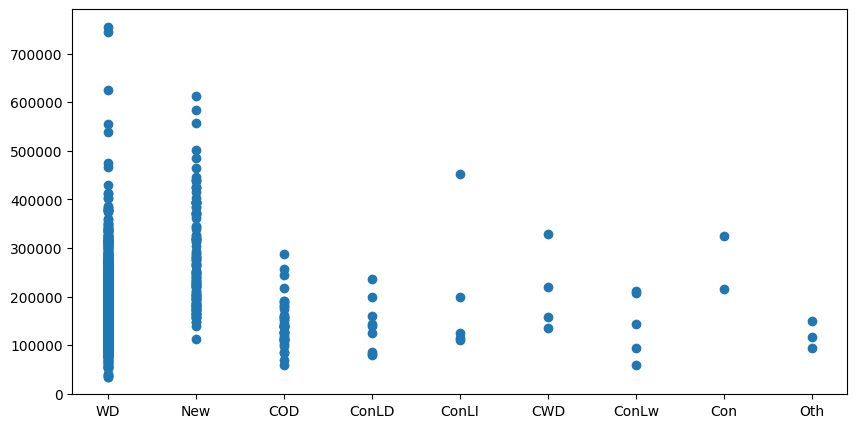

In [51]:
fig,ax= plt.subplots(figsize=(10,5))
ax.scatter(df["SaleType"],df["SalePrice"] )

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

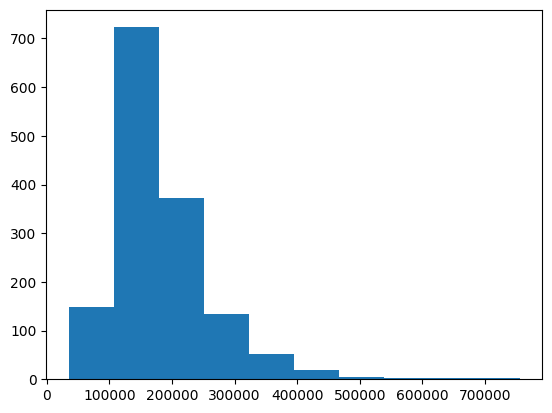

In [52]:
plt.hist(df["SalePrice"])

In [53]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [54]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

In [55]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]=content.astype("category").cat.as_ordered()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [57]:
df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [58]:
# fill numeric missing values first
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [59]:
# check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [60]:
# fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=content.fillna(content.median())

In [61]:
# fill numeric rows with the median
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label+"_is_missing"]=pd.isnull(content)
            df_test[label]=content.fillna(content.median())

In [62]:
## filling and turning categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)


MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [63]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column for missing values
        df[label+"_is_missing"] = pd.isnull(content)
        df[label]=pd.Categorical(content).codes+1

In [64]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column for missing values
        df_test[label+"_is_missing"] = pd.isnull(content)
        df_test[label]=pd.Categorical(content).codes+1

C:\Users\kirol\AppData\Local\Temp\ipykernel_13848\431379502.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[label+"_is_missing"] = pd.isnull(content)
C:\Users\kirol\AppData\Local\Temp\ipykernel_13848\431379502.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[label+"_is_missing"] = pd.isnull(content)
C:\Users\kirol\AppData\Local\Temp\ipykernel_13848\431379502.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


In [66]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
PoolQC_is_missing,True,True,True,True,True
Fence_is_missing,True,True,True,True,True
MiscFeature_is_missing,True,True,True,True,True
SaleType_is_missing,False,False,False,False,False


In [67]:
df.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
PoolQC_is_missing           0
Fence_is_missing            0
MiscFeature_is_missing      0
SaleType_is_missing         0
SaleCondition_is_missing    0
Length: 127, dtype: int64

In [102]:
df.head().T,df_test.head().T

(                              0      1      2      3      4
 Id                            1      2      3      4      5
 MSSubClass                   60     20     60     70     60
 MSZoning                      4      4      4      4      4
 LotFrontage                65.0   80.0   68.0   60.0   84.0
 LotArea                    8450   9600  11250   9550  14260
 ...                         ...    ...    ...    ...    ...
 PoolQC_is_missing          True   True   True   True   True
 Fence_is_missing           True   True   True   True   True
 MiscFeature_is_missing     True   True   True   True   True
 SaleType_is_missing       False  False  False  False  False
 SaleCondition_is_missing  False  False  False  False  False
 
 [127 rows x 5 columns],
                               0      1      2      3      4
 Id                         1461   1462   1463   1464   1465
 MSSubClass                   20     20     60     60    120
 MSZoning                      3      4      4      4     

In [111]:
df.columns,df_test.columns

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities',
        ...
        'GarageType_is_missing', 'GarageFinish_is_missing',
        'GarageQual_is_missing', 'GarageCond_is_missing',
        'PavedDrive_is_missing', 'PoolQC_is_missing', 'Fence_is_missing',
        'MiscFeature_is_missing', 'SaleType_is_missing',
        'SaleCondition_is_missing'],
       dtype='object', length=127),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities',
        ...
        'GarageType_is_missing', 'GarageFinish_is_missing',
        'GarageQual_is_missing', 'GarageCond_is_missing',
        'PavedDrive_is_missing', 'PoolQC_is_missing', 'Fence_is_missing',
        'MiscFeature_is_missing', 'SaleType_is_missing',
        'SaleCondition_is_missing'],
       dtype='object', length=134))

### Modelling

In [73]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [76]:
np.random.seed(42)
X=df.drop("SalePrice",axis=1)
Y=df["SalePrice"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [79]:
models={
    "Lasso":Lasso(),
    "XGboost":HistGradientBoostingRegressor(),
    "LinearReg":LinearRegression(),
    "RandForReg":RandomForestRegressor()}
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    # set random seed
    np.random.seed(42)
    # loop through models
    model_scores={}
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train,Y_train)
        # evaluate the model and appends its score to model_scores
        model_scores[name] = model.score(X_test,Y_test)

    return model_scores

In [80]:
model_scores=fit_and_score(models,X_train,X_test,Y_train,Y_test)
model_scores

c:\Users\kirol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.800e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


{'Lasso': 0.8073501174721537,
 'XGboost': 0.8926647480992635,
 'LinearReg': 0.8067056927574284,
 'RandForReg': 0.8908523277534186}

<Axes: >

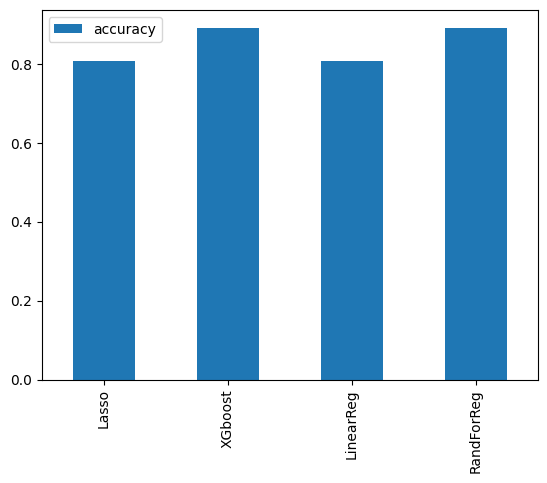

In [81]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [94]:
#create hyperparameter grid for XGboost
xgb_grid={"max_depth":[3,5,7],
         "learning_rate":[0.1,0.01,0.001],
         "min_samples_leaf":np.arange(1,20,5)}

In [95]:
xgb_grid_log=GridSearchCV(HistGradientBoostingRegressor(),
                          param_grid=xgb_grid,
                          cv=5,
                          verbose=True)
xgb_grid_log.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'min_samples_leaf': array([ 1,  6, 11, 16])},
             verbose=True)

In [96]:
xgb_grid_log.score(X_test,Y_test)

0.902079667403938

In [104]:
df_test.info(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 134 entries, Id to SaleCondition_is_missing
dtypes: bool(54), float64(11), int64(26), int8(43)
memory usage: 560.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


(None, None)

In [105]:
y_preds=xgb_grid_log.predict(X_test)
y_preds

array([140207.76863836, 330418.87023278, 116437.88828446, 169102.0235428 ,
       325628.08720655,  86249.26657069, 229683.88632372, 148749.43551984,
        87902.65842506, 136121.25886483, 152302.40879209, 122226.69029397,
       120122.49723344, 205708.5267026 , 170082.04058324, 134335.94805433,
       194028.39577323, 139940.7504465 , 116630.51909781, 206453.64801414,
       141017.5966304 , 223511.94674675, 169232.52340427, 134832.63278596,
       199746.56093638, 168757.20696629, 196200.00606689, 115912.29002668,
       175878.5880465 , 196307.22370742, 131024.50876821, 243031.1687565 ,
       198896.7442273 , 119688.350907  , 250642.95317343, 148982.71673173,
       126582.93506743, 213679.10585266, 312088.47631986, 105886.18628112,
       127854.16152469, 234522.09278138, 117206.99889518, 387792.08225829,
       126136.58824403, 138294.05927916, 116623.92613483, 128192.9964522 ,
       418462.0919666 , 143093.13529087, 118332.45723818, 189549.88055501,
       115040.92616116, 3

In [121]:
set(df)-set(df_test.columns)

{'SalePrice'}

In [122]:
df_t=df_test.copy()

In [131]:

df_t.drop("TotalBsmtSF_is_missing",axis=1,inplace=True)


In [132]:
test_preds=xgb_grid_log.predict(df_t)

In [133]:
test_preds

array([126391.72143903, 157877.95364856, 182475.99722328, ...,
       170643.52577807, 122491.35389115, 217028.79757579])

In [142]:
df_final=pd.DataFrame(df_test["Id"])

In [144]:
df_final.insert(1,"SalePrice",test_preds)

In [145]:
df_final

,Id,SalePrice
0,1461,126391.721439
1,1462,157877.953649
2,1463,182475.997223
3,1464,192214.626714
4,1465,191318.464979
...,...,...
1454,2915,84638.959542
1455,2916,87287.447763
1456,2917,170643.525778
1457,2918,122491.353891


In [147]:
df_final.to_csv("submission.csv",index=False)